In [619]:
#Import all necessary packages

import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
# from sklearn.externals import pickle,json
import pickle,json
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib.animation as  animation 
import imageio
import os 
# import cv2
from PIL import Image
import squarify
%matplotlib inline

In [620]:
#Check the path to the directory where you are currently in
%pwd

'/Users/melody/Desktop/repos/5002/project'

In [621]:
my_path = '/Users/melody/Desktop/repos/5002/project'

In [622]:
!ls

5002project1104                    rotten_tomatoes_ML.ipynb
5002project1104的副本              rotten_tomatoes_movies.csv
Splash.pptx                        rotten_tomatoes_type_analyse.ipynb
knn_model


In [623]:
# read in data
my_df = pd.read_csv(f'{my_path}/rotten_tomatoes_movies.csv',
                    low_memory = False)
print(my_df.shape)
my_df.head(3)

(17712, 22)


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8


In [624]:
#split the data into three sets in a 70-15-15 manner. 
#Calculate 15% of 17712. This is about 12398 rows of data. 

def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]

mydf_train_valid,mydf_test = mydf_splitter(my_df,12398)

print(mydf_train_valid.shape,mydf_test.shape)


(12398, 22) (5314, 22)


<AxesSubplot:xlabel='Feature', ylabel='Percent missing'>

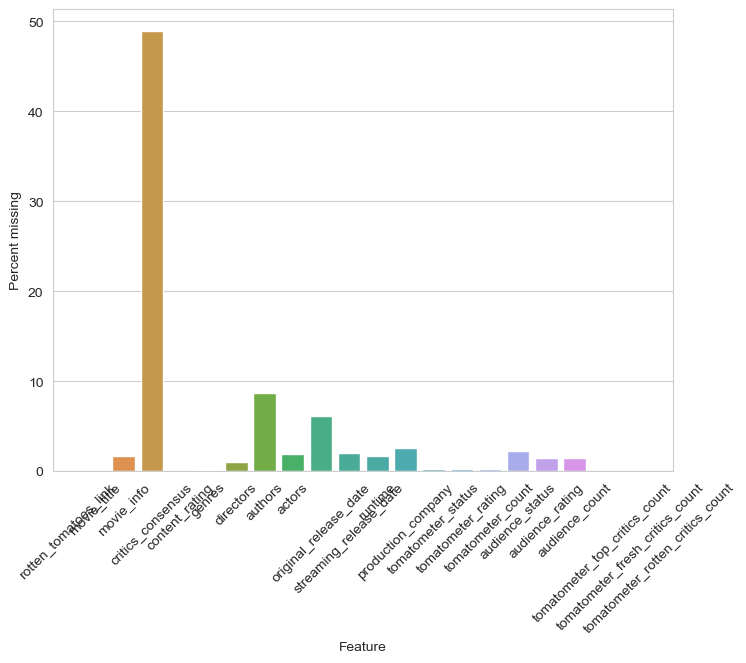

In [625]:
#Deal with missing values

null_vals = mydf_train_valid.isnull().sum()/len(mydf_train_valid)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [626]:
mydf_train_valid_2 = mydf_train_valid.drop("movie_info",axis = 1)#清理缺失值过多的数据列
print(mydf_train_valid_2.shape)
mydf_train_valid_2.head(2)

(12398, 21)


,rotten_tomatoes_link,movie_title,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


In [627]:
#Check types of each column with the dataframe info () method
mydf_train_valid_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12398 entries, 0 to 12397
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              12398 non-null  object 
 1   movie_title                       12398 non-null  object 
 2   critics_consensus                 6336 non-null   object 
 3   content_rating                    12398 non-null  object 
 4   genres                            12386 non-null  object 
 5   directors                         12271 non-null  object 
 6   authors                           11326 non-null  object 
 7   actors                            12168 non-null  object 
 8   original_release_date             11644 non-null  object 
 9   streaming_release_date            12146 non-null  object 
 10  runtime                           12194 non-null  float64
 11  production_company                12073 non-null  object 
 12  toma

In [628]:
'''You can see that several of the columns or features are "object" type
These need to be changed to category before we can convert those to 
mappings and numbers'''
#1 (a) Define a function to convert object types and string types to category type

def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

In [629]:
mydf_train_valid_3 = str_to_cat(mydf_train_valid_2)
print()

In [630]:
#Check dtypes of columns after this operation
mydf_train_valid_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12398 entries, 0 to 12397
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   rotten_tomatoes_link              12398 non-null  category
 1   movie_title                       12398 non-null  category
 2   critics_consensus                 6336 non-null   category
 3   content_rating                    12398 non-null  category
 4   genres                            12386 non-null  category
 5   directors                         12271 non-null  category
 6   authors                           11326 non-null  category
 7   actors                            12168 non-null  category
 8   original_release_date             11644 non-null  category
 9   streaming_release_date            12146 non-null  category
 10  runtime                           12194 non-null  float64 
 11  production_company                12073 non-null  cate

In [631]:
#Check the cateogry mapping

print(mydf_train_valid_3.content_rating.cat.categories)
print(mydf_train_valid_3.tomatometer_status.cat.categories)
print(mydf_train_valid_3.audience_status.cat.categories)


Index(['G', 'NC17', 'NR', 'PG', 'PG-13', 'R'], dtype='object')
Index(['Certified-Fresh', 'Fresh', 'Rotten'], dtype='object')
Index(['Spilled', 'Upright'], dtype='object')


In [632]:
#Define impute functions

def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [633]:
mydf_train_valid_4,my_table = mydf_preprocessor(mydf_train_valid_3,null_table = None)

In [634]:
mydf_train_valid_4.head(3)
mydf_train_valid_4.columns

Index(['rotten_tomatoes_link', 'movie_title', 'critics_consensus',
       'content_rating', 'genres', 'directors', 'authors', 'actors',
       'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'runtime_na', 'tomatometer_rating_na', 'tomatometer_count_na',
       'audience_rating_na', 'audience_count_na'],
      dtype='object')

In [635]:
my_table

{'runtime': 99.0,
 'tomatometer_rating': 66.0,
 'tomatometer_count': 28.0,
 'audience_rating': 63.0,
 'audience_count': 4692.0}

In [636]:
#Vertical split of the dataframe). Here the Y column is the variable we are trying to predict (spilled or upright)
Y = mydf_train_valid_4["audience_status"]
X = mydf_train_valid_4.drop(["audience_status"],axis = 1)

print(X.shape,Y.shape)

(12398, 25) (12398,)


In [637]:
X_cat = X[['audience_rating','rotten_tomatoes_link', 'movie_title','critics_consensus','content_rating', 'genres', 'directors', 'authors', 'actors','original_release_date', 'streaming_release_date','production_company', 'tomatometer_rating','tomatometer_count', 'tomatometer_status','tomatometer_top_critics_count','tomatometer_fresh_critics_count','tomatometer_rotten_critics_count','runtime_na','tomatometer_rating_na', 'tomatometer_count_na','audience_rating_na','audience_count_na']]
X_con = X.drop(X_cat,axis = 1)
print(X_cat.shape,X_con.shape)

(12398, 23) (12398, 2)


In [638]:
#Scale the continuous variables

scaler = preprocessing.StandardScaler().fit(X_con)
X_con_sc = pd.DataFrame(scaler.transform(X_con))
X_con_sc.columns = ["runtime","audience_count"]
print(X_con_sc.shape)
X_con_sc.head(3)

(12398, 2)


,runtime,audience_count
0,0.883117,0.066293
1,-0.653547,-0.075087
2,1.042083,-0.073277


In [639]:
#Store this scaler variable 

df_list = [X_cat,X_con_sc]
X_full = pd.concat(df_list,axis = 1)
print(X_full.shape)
X_full.head(2)

(12398, 25)


,audience_rating,rotten_tomatoes_link,movie_title,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime_na,tomatometer_rating_na,tomatometer_count_na,audience_rating_na,audience_count_na,runtime,audience_count
0,53.0,1,9708,5681,4,180,1083,1756,7281,3863,...,43,73,76,False,False,False,False,False,0.883117,0.066293
1,64.0,2,9868,4123,6,627,4869,6713,1844,3882,...,44,123,19,False,False,False,False,False,-0.653547,-0.075087


In [640]:
#Split into train and valid sets for model building 

X_train,X_valid = mydf_splitter(X_full,900)
Y_train,Y_valid = mydf_splitter(Y,900)

print(X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape)


(900, 25) (11498, 25) (900,) (11498,)


In [641]:
#Training the model and evaluating it on the validation set

my_knn_model = KNeighborsClassifier(n_neighbors = 5,weights = 'uniform')
my_knn_model.fit(X_train,Y_train)

#Predict on the validation set
Y_pred = my_knn_model.predict(X_valid)
# mode, _ = stats.mode(_y[neigh_ind, k], axis=1)

/Users/melody/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

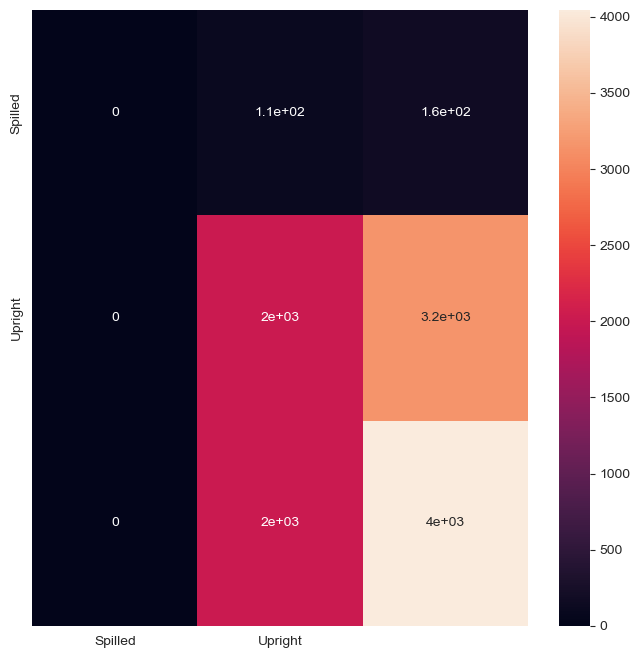

In [642]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

my_knn_cmatrix = confusion_matrix(Y_valid,Y_pred)

my_knn_df = pd.DataFrame(my_knn_cmatrix)
plt.figure(figsize = (8,8))
sns.heatmap(my_knn_df, xticklabels = ["Spilled","Upright"],
            yticklabels = ["Spilled","Upright"],annot = True)

In [643]:
print(accuracy_score(Y_valid,Y_pred),
      matthews_corrcoef(Y_valid,Y_pred),
      f1_score(Y_valid,Y_pred,average='weighted'))

#An MCC of -0.0474 looks bad !We need to do model tuning or 
#hyperparameter tuning to try to make it better

0.5274830405287876 0.058001816587088695 0.5128700188013791


In [644]:
#Do hyper parameter tuning

from sklearn.metrics import accuracy_score

num_neighs = list()
accuracy_list = list()


for neighbor in range(1,20):
    my_knn_model = KNeighborsClassifier(n_neighbors = neighbor,weights = 'uniform')
    my_knn_model.fit(X_train,Y_train)
    Y_pred = my_knn_model.predict(X_valid)
    accuracy = accuracy_score(Y_valid,Y_pred)
    num_neighs.append(neighbor)
    accuracy_list.append(accuracy)



/Users/melody/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/melody/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

/Users/melody/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/melody/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

In [645]:
eval_df =  pd.DataFrame({"Num of neighbors": num_neighs,"Valid accuracy Score": accuracy_list})
eval_df

,Num of neighbors,Valid accuracy Score
0,1,0.522439
1,2,0.495651
2,3,0.513655
3,4,0.506349
4,5,0.527483
5,6,0.522613
6,7,0.532353
7,8,0.527048
8,9,0.527048
9,10,0.527309


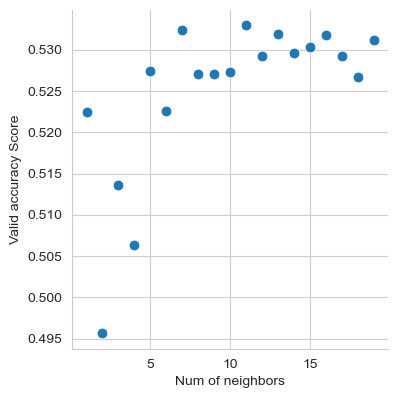

In [646]:
#Plot accuracy Vs validation set accuracy of the model
sns.set_style("whitegrid")
sns.pairplot(eval_df,x_vars = "Num of neighbors",
             y_vars = "Valid accuracy Score",plot_kws = {'s': 60},height = 4.0)

In [647]:
'''Congrats, K = 14 seems to give the best validation set accuracy (= 0.6) !!! So, let's turn to the test set
and use K = 14 for that !OK, so how do we save this trained and 
hyperparameter tuned model for later use? First, we club together, the
train and valid set. We already have this dataframe. Then, we make and 
train a model with K = 14. Then save it with joblib, which we imported 
earlier'''


knn_model_fin = KNeighborsClassifier(n_neighbors = 14,weights = 'uniform')
knn_model_fin.fit(X_full,Y)

!mkdir knn_model
knn_model_name = f'{my_path}/knn_model/knn_model_final.sav'
joblib.dump(knn_model_fin,knn_model_name)

mkdir: knn_model: File exists


['/Users/melody/Desktop/repos/5002/project/knn_model/knn_model_final.sav']

In [648]:
#Make sure your model has been saved !
!ls knn_model

knn_model_final.sav


In [649]:
# Congrats! You have saved your model!Now, let's read it back in!
knn_model_loaded = joblib.load(knn_model_name)

In [650]:
#Before applying this on the test set, we need to pre-process the test set in exactly the same way we did the train_valid set 

print(mydf_test.shape)
mydf_test.head(3)


(5314, 22)


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
12398,m/reincarnated,Reincarnated,Rapper Snoop Dogg immerses himself in the Rast...,NaN,R,"Documentary, Special Interest",Andy Capper,NaN,"Dr. Dre, Daz, Diplo, Angela Hunte, Ariel Recht...",2013-03-15,...,AEC,Rotten,28.0,29.0,Spilled,41.0,492.0,14,8,21
12399,m/reindeer_games,Reindeer Games (Deception),"Just released from prison, all Rudy Duncan (Be...","Despite a decent cast, subpar acting and a con...",R,"Action & Adventure, Drama, Mystery & Suspense",John Frankenheimer,Ehren Kruger,"Ben Affleck, Gary Sinise, Charlize Theron, Den...",2000-02-25,...,Dimension Films,Rotten,25.0,88.0,Spilled,27.0,43115.0,27,22,66
12400,m/reivers,The Reivers,In Mississippi at the turn of the 20th century...,NaN,PG,"Action & Adventure, Classics, Comedy, Drama",Mark Rydell,"Irving Ravetch, Harriet Frank Jr. / Irving Rav...","Steve McQueen, Sharon Farrell, Mitch Vogel, Ru...",1969-01-01,...,Viacom,Fresh,80.0,5.0,Spilled,49.0,1120.0,1,4,1


In [651]:
#get rid of the "cabin" column as we did before with the train_valid set
mydf_test1 = mydf_test.drop("movie_info",axis = 1)
print(mydf_test1.shape)
mydf_test1.head(3)

(5314, 21)


,rotten_tomatoes_link,movie_title,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
12398,m/reincarnated,Reincarnated,NaN,R,"Documentary, Special Interest",Andy Capper,NaN,"Dr. Dre, Daz, Diplo, Angela Hunte, Ariel Recht...",2013-03-15,2016-12-05,...,AEC,Rotten,28.0,29.0,Spilled,41.0,492.0,14,8,21
12399,m/reindeer_games,Reindeer Games (Deception),"Despite a decent cast, subpar acting and a con...",R,"Action & Adventure, Drama, Mystery & Suspense",John Frankenheimer,Ehren Kruger,"Ben Affleck, Gary Sinise, Charlize Theron, Den...",2000-02-25,2016-08-02,...,Dimension Films,Rotten,25.0,88.0,Spilled,27.0,43115.0,27,22,66
12400,m/reivers,The Reivers,NaN,PG,"Action & Adventure, Classics, Comedy, Drama",Mark Rydell,"Irving Ravetch, Harriet Frank Jr. / Irving Rav...","Steve McQueen, Sharon Farrell, Mitch Vogel, Ru...",1969-01-01,2020-09-01,...,Viacom,Fresh,80.0,5.0,Spilled,49.0,1120.0,1,4,1


In [652]:
mydf_test2 = str_to_cat(mydf_test1)
mydf_test2.movie_title.cat.categories

Index(['!Women Art Revolution', '#Unfit: The Psychology of Donald Trump',
       ''Round Midnight', ''X'---The Man With the X-Ray Eyes', '(Untitled)',
       '...So Goes the Nation', '10 to Midnight', '12', '36 quai des orfevres',
       'A River Runs Through It',
       ...
       'Zoom', 'Zoot Suit', 'Zootopia', 'Zorba the Greek', 'Zulu', 'Zulu Dawn',
       'sleep furiously.', 'xXx: Return of Xander Cage',
       'xXx: State of the Union', 'Átame! (Tie Me Up! Tie Me Down!)'],
      dtype='object', length=5236)

In [653]:
#Check for the Embarked column
mydf_test2.content_rating.cat.categories

Index(['G', 'NC17', 'NR', 'PG', 'PG-13', 'R'], dtype='object')

In [654]:
#The category codes are the same. We can proceed.
#Make sure you use the same impute values of median.
mydf_test3,my_table1 = mydf_preprocessor(mydf_test2,
                                         null_table = my_table)
print(mydf_test3.shape)
mydf_test3.head(3)

(5314, 26)


,rotten_tomatoes_link,movie_title,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime_na,tomatometer_rating_na,tomatometer_count_na,audience_rating_na,audience_count_na
12398,1,85,0,6,514,217,0,1340,2093,724,...,41.0,492.0,14,8,21,False,False,False,False,False
12399,2,86,548,6,164,1757,1256,443,1139,625,...,27.0,43115.0,27,22,66,False,False,False,False,False
12400,3,3111,0,4,73,2323,1719,4629,353,1405,...,49.0,1120.0,1,4,1,False,False,False,False,False


In [655]:
my_table1

{'runtime': 99.0,
 'tomatometer_rating': 66.0,
 'tomatometer_count': 28.0,
 'audience_rating': 63.0,
 'audience_count': 4692.0}

In [656]:
# Now, let's split out the X and Y variables (vertical split of the dataframe)
#Remember we did this previously!


Y_t = mydf_test3["audience_status"]
X_t = mydf_test3.drop(["audience_status"],axis = 1)

print(X_t.shape,Y_t.shape)

(5314, 25) (5314,)


In [657]:
#Separate continuous and categorical variables/columns for scaling

X_cat_t = X_t[['audience_rating','rotten_tomatoes_link', 'movie_title','critics_consensus','content_rating', 'genres', 'directors', 'authors', 'actors','original_release_date', 'streaming_release_date','production_company', 'tomatometer_rating','tomatometer_count', 'tomatometer_status','tomatometer_top_critics_count','tomatometer_fresh_critics_count','tomatometer_rotten_critics_count','runtime_na','tomatometer_rating_na', 'tomatometer_count_na','audience_rating_na','audience_count_na']]
X_con_t = X_t.drop(X_cat_t,axis = 1)
print(X_cat_t.shape,X_con_t.shape)

(5314, 23) (5314, 2)


In [658]:
X_con_sct = pd.DataFrame(scaler.transform(X_con_t))
X_con_sct.columns = ["runtime","audience_count"]
print(X_con_sct.shape)
X_con_sct.head(2)


(5314, 2)


,runtime,audience_count
0,-0.335616,-0.081539
1,0.088291,-0.056725


In [659]:
print(X_cat_t.shape,X_con_sct.shape)

(5314, 23) (5314, 2)


In [660]:
#Re-index before merging
X_cat_t.reset_index(inplace = True,drop = False)

In [661]:
X_cat_t.head()

,index,audience_rating,rotten_tomatoes_link,movie_title,critics_consensus,content_rating,genres,directors,authors,actors,...,tomatometer_count,tomatometer_status,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime_na,tomatometer_rating_na,tomatometer_count_na,audience_rating_na,audience_count_na
0,12398,41.0,1,85,0,6,514,217,0,1340,...,29.0,3,14,8,21,False,False,False,False,False
1,12399,27.0,2,86,548,6,164,1757,1256,443,...,88.0,3,27,22,66,False,False,False,False,False
2,12400,49.0,3,3111,0,4,73,2323,1719,4629,...,5.0,2,1,4,1,False,False,False,False,False
3,12401,58.0,4,87,0,4,505,975,1179,4736,...,38.0,2,15,29,9,False,False,False,False,False
4,12402,63.0,5,88,0,4,47,1083,0,4555,...,5.0,3,2,1,4,False,False,False,False,False


In [662]:
X_cat_t.drop("index",inplace = True,axis = 1)
X_cat_t.head(2)

/var/folders/jc/tf67_fr517b0r5nng1m1d2fm0000gn/T/ipykernel_26004/3562070127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_t.drop("index",inplace = True,axis = 1)


,audience_rating,rotten_tomatoes_link,movie_title,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_count,tomatometer_status,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime_na,tomatometer_rating_na,tomatometer_count_na,audience_rating_na,audience_count_na
0,41.0,1,85,0,6,514,217,0,1340,2093,...,29.0,3,14,8,21,False,False,False,False,False
1,27.0,2,86,548,6,164,1757,1256,443,1139,...,88.0,3,27,22,66,False,False,False,False,False


In [663]:
#Merge the two sets of columns
df_list_I = [X_cat_t,X_con_sct]
X_test_I = pd.concat(df_list_I,axis = 1)
print(X_test_I.shape)
X_test_I.head(2)

(5314, 25)


,audience_rating,rotten_tomatoes_link,movie_title,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime_na,tomatometer_rating_na,tomatometer_count_na,audience_rating_na,audience_count_na,runtime,audience_count
0,41.0,1,85,0,6,514,217,0,1340,2093,...,14,8,21,False,False,False,False,False,-0.335616,-0.081539
1,27.0,2,86,548,6,164,1757,1256,443,1139,...,27,22,66,False,False,False,False,False,0.088291,-0.056725


In [664]:
#Now we are ready to test it out. Let's load the saved model first.
kNN_loaded = joblib.load(f'{my_path}/knn_model/knn_model_final.sav')

In [665]:
#Testing...
Y_test_pred = kNN_loaded.predict(X_test_I)

/Users/melody/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [666]:
print(accuracy_score(Y_t,Y_test_pred),
      matthews_corrcoef(Y_t,Y_test_pred),
      f1_score(Y_t,Y_test_pred,average='weighted'))

0.5148663906661648 0.04382210625759755 0.500308353738613


In [667]:
#Done! Our kNN model is not doing great on this dataset but as Ram said, what we learnt how to properly use machine learning is more important.

In [668]:
#Write out full train_valid and test dataframes 

X_full["Survived"] = Y
X_test_I["Survived"] = Y_t

print(X_full.shape)
print(X_test_I.shape)

(12398, 26)
(5314, 26)
